In [16]:
import numpy as np
import pandas as pd
import numpy.linalg as alg
import scipy as sp
import matplotlib.pyplot as plt

### A. Load the Data

In [17]:
data = pd.read_csv('/Users/zhamengyue/Documents/UST2021Spring/MATH5473/Homework/CityDistance.csv')

print(data)

   Beijing  Shanghai  HongKong    Dubai   Turku  Berlin  NewYork
0      0.0    1075.0    1970.5   5840.2  6443.0  7358.0  10985.8
1   1075.0       0.0    1214.7   6417.4  7504.9  8402.5  11870.3
2   1970.5    1214.7       0.0   5952.5  7966.0  8751.6  12956.0
3   5840.2    6417.4    5952.5      0.0  4652.7  4622.8  11002.3
4   6443.0    7504.9    7966.0   4652.7     0.0  1035.1   6470.8
5   7358.0    8402.5    8751.6   4622.8  1035.1     0.0   6380.8
6  10985.8   11870.3   12956.0  11002.3  6470.8  6380.8      0.0


In [18]:
Data = np.array(data)
n = len(Data)
cities = np.array(data.columns)

### B. My own MDS

In [19]:
def mds(D, dim=[]):
    H = -np.ones((n, n))/n
    H = -H.dot(D ** 2).dot(H)/2
    evals, evecs = alg.eigh(H)

    # Sort by eigenvalu in descending order
    idx = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:, idx]

    #Compute the coordinates using positive eigenvalued components only
    w, = np.where(evals > 0)
    if dim!=[]:
        arr = evals
        w = arr.argsort()[-dim:][::-1]
    if np.any(evals[w]<0):
        print('Error: Not enough positive eigenvalues for the selected dim.')
        return []
    L = np.diag(np.sqrt(evals[w]))
    V = evecs[:, w]
    Y = V.dot(L)
    return Y, evals, evecs

### C. 2-D Embedding with 2 Principal Components

In [20]:
X2, eigen_values, eigen_vectors = mds(Data, dim=2)

### D. Plot Cumsum Eigenvalues

In [21]:
total = np.sum(eigen_values)
normed_eigen_values = eigen_values/total
print("Eigenvalues are:\n",eigen_values)
print("Normed Eigenvalues are:\n", normed_eigen_values)

Eigenvalues are:
 [ 1.97760133e-09  1.42359021e-24  2.42610861e-25 -1.08922722e-41
 -1.92832396e-08 -3.14654136e-08 -1.65291195e+08]
Normed Eigenvalues are:
 [-1.19643477e-17 -8.61261973e-33 -1.46777849e-33  6.58974739e-50
  1.16662231e-16  1.90363520e-16  1.00000000e+00]


Yes, there are some negative eigenvalues

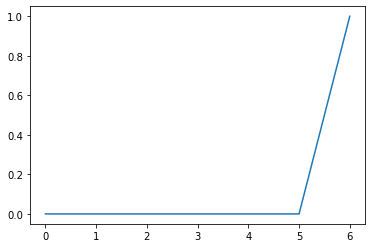

In [22]:
plt.figure()
plt.plot(range(n), normed_eigen_values)
plt.show()

### E. Scatter plot of cities

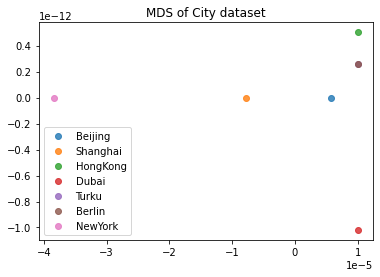

In [23]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
for i in range(n):
    plt.scatter(X2[i, 0], X2[i, 1], alpha=.8, label=cities[i])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('MDS of City dataset')
plt.show()


If you revert the graph above 90 degree to the right. Then the graph will basically reflect the position relationship like Dubai is in the West of east Asian countries like Beijing and Hong Kong. However, there is not much cities near New york, so New york looks liek an outlier and lacks information to help it being embedded better. 